# Deep Learning with PyTorch: A 60 Minute Blitz

Notes on [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), MLW, 2018-08-24

In [1]:
import torch
import numpy as np

## Creating tensors

In [2]:
x = torch.empty(5, 3)
x

tensor([[ 0.0000e+00, -4.6566e-10,  6.9133e-27],
        [-2.0005e+00,  4.7339e+30,  1.1096e+27],
        [ 4.1004e+04,  4.5444e+30,  4.7429e+30],
        [ 1.7749e+28,  7.1447e+31,  7.9460e+08],
        [ 5.0944e-14,  1.6109e-19,  1.8888e+31]])

In [3]:
x.shape

torch.Size([5, 3])

In [4]:
x.size()

torch.Size([5, 3])

torch.Size acts like a tuple

In [5]:
x.shape[0]

5

In [6]:
type(x)

torch.Tensor

In [7]:
type(x)

torch.Tensor

Note it looks like you can optionally pass the shape as a tuple, making this constructors compatible with  function is incompatible with numpy (where shape is passed as a tuple)

Other ways to create a torch tensor 

In [8]:
x = torch.zeros(5, 3)

In [9]:
y = torch.zeros((5, 3))

Comparison yields ints apparently

In [10]:
x == y

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)

Default dtype

In [11]:
x.dtype

torch.float32

Specify dtype

In [12]:
x = torch.zeros(5, 3, dtype=torch.long)
x.dtype

torch.int64

You can't compare tensors of different dtypes

In [13]:
try:
    x == y
except RuntimeError as e:
    print(e)

Expected object of type torch.LongTensor but found type torch.FloatTensor for argument #2 'other'


In [14]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [15]:
x.dtype

torch.float32

Create tensor with same shape and dtype

In [16]:
torch.randn_like(x)

tensor([-0.4852,  1.6978])

Override dtype with `*_like` function

In [17]:
torch.randn_like(x, dtype=torch.float)

tensor([-0.9508,  0.4762])

Override shape with `new_*` methods

In [18]:
x.new_ones(5)

tensor([1., 1., 1., 1., 1.])

I think both `new` and `like` methods use the same device as the orginal tensor (see [PyTorch 0.4.0 Migration Guide
](https://pytorch.org/2018/04/22/0_4_0-migration-guide.html)).

## Operations 

In [19]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

tensor([[0.7210, 0.7382, 0.8625],
        [0.9041, 0.6797, 1.8745],
        [0.8891, 1.2740, 1.2072],
        [0.8699, 1.0480, 0.2307],
        [1.7523, 0.7229, 1.0806]])


In [20]:
torch.add(x, y)

tensor([[0.7210, 0.7382, 0.8625],
        [0.9041, 0.6797, 1.8745],
        [0.8891, 1.2740, 1.2072],
        [0.8699, 1.0480, 0.2307],
        [1.7523, 0.7229, 1.0806]])

Pre-existing output tensor as argument

In [21]:
z = torch.zeros_like(x)
torch.add(x, y, out=z)

tensor([[0.7210, 0.7382, 0.8625],
        [0.9041, 0.6797, 1.8745],
        [0.8891, 1.2740, 1.2072],
        [0.8699, 1.0480, 0.2307],
        [1.7523, 0.7229, 1.0806]])

traing _ methods modifies inplace and returns values, e.g.

In [22]:
y.add_(x)

tensor([[0.7210, 0.7382, 0.8625],
        [0.9041, 0.6797, 1.8745],
        [0.8891, 1.2740, 1.2072],
        [0.8699, 1.0480, 0.2307],
        [1.7523, 0.7229, 1.0806]])

In [23]:
y.t_()

tensor([[0.7210, 0.9041, 0.8891, 0.8699, 1.7523],
        [0.7382, 0.6797, 1.2740, 1.0480, 0.7229],
        [0.8625, 1.8745, 1.2072, 0.2307, 1.0806]])

In [24]:
y

tensor([[0.7210, 0.9041, 0.8891, 0.8699, 1.7523],
        [0.7382, 0.6797, 1.2740, 1.0480, 0.7229],
        [0.8625, 1.8745, 1.2072, 0.2307, 1.0806]])

+= works as expected

In [25]:
y += x.t()

In [26]:
y

tensor([[0.8137, 0.9856, 1.5894, 1.3002, 2.6367],
        [1.2290, 1.0552, 2.2439, 1.3978, 0.9381],
        [1.0194, 2.8105, 1.7534, 0.2838, 1.9984]])

##  Indexing

In [27]:
x

tensor([[0.0927, 0.4908, 0.1568],
        [0.0815, 0.3756, 0.9360],
        [0.7003, 0.9699, 0.5462],
        [0.4303, 0.3498, 0.0532],
        [0.8844, 0.2152, 0.9178]])

In [28]:
x[:, 1]

tensor([0.4908, 0.3756, 0.9699, 0.3498, 0.2152])

In [29]:
x[1, :]

tensor([0.0815, 0.3756, 0.9360])

## Reshape

Use view method to reshape.

In [30]:
x = torch.rand(4,4)

In [31]:
x.view(16)

tensor([0.6073, 0.3656, 0.8352, 0.1288, 0.7314, 0.2910, 0.7113, 0.6062, 0.0039,
        0.0969, 0.3781, 0.1825, 0.8540, 0.7709, 0.1648, 0.0198])

In [32]:
try:
    x.view(15)
except RuntimeError as e:
    print(e)

invalid argument 2: size '[15]' is invalid for input with 16 elements at /Users/soumith/code/builder/wheel/pytorch-src/aten/src/TH/THStorage.cpp:84


Seems like torch always raises RuntimeError?!

 -1 implies infer from shape.

In [33]:
x.view(8, -1)

tensor([[0.6073, 0.3656],
        [0.8352, 0.1288],
        [0.7314, 0.2910],
        [0.7113, 0.6062],
        [0.0039, 0.0969],
        [0.3781, 0.1825],
        [0.8540, 0.7709],
        [0.1648, 0.0198]])

Extract scalar value from single item tensor

In [34]:
x = torch.rand(1)
x

tensor([0.6926])

In [35]:
x.item()

0.6925738453865051

## Numpy and back

In [36]:
x = torch.rand(4,4)
xarr = x.numpy()

In [37]:
type(xarr), xarr.dtype

(numpy.ndarray, dtype('float32'))

Note memory is shared

In [38]:
xarr[:, 1] = 5

In [39]:
x

tensor([[0.9177, 5.0000, 0.9195, 0.7898],
        [0.2852, 5.0000, 0.2752, 0.0168],
        [0.8009, 5.0000, 0.1063, 0.9993],
        [0.7879, 5.0000, 0.0222, 0.1556]])

In [40]:
x[1, :] = -5

In [41]:
xarr

array([[ 0.9176599 ,  5.        ,  0.91945255,  0.78981787],
       [-5.        , -5.        , -5.        , -5.        ],
       [ 0.80085343,  5.        ,  0.10625994,  0.9992986 ],
       [ 0.78786665,  5.        ,  0.02222532,  0.15563226]],
      dtype=float32)

## CUDA

In [42]:
x.device

device(type='cpu')

In [43]:
torch.cuda.is_available()

False

Create tensor directly on GPU. (The if statement means this won't run unless GPU is detected.)

In [44]:
if torch.cuda.is_available():
    device = torch.get_device("cuda")
    y = torch.zeros_like(x, device=device)

This is the unhelpful error you get without a GPU

In [45]:
try:
    device = torch.get_device("cuda")
except TypeError as e:
    print(e)

get_device(): argument 'input' (position 1) must be Tensor, not str


The .to method moves a tensor between devices (inplace?)

In [46]:
x.to("cpu")

tensor([[ 0.9177,  5.0000,  0.9195,  0.7898],
        [-5.0000, -5.0000, -5.0000, -5.0000],
        [ 0.8009,  5.0000,  0.1063,  0.9993],
        [ 0.7879,  5.0000,  0.0222,  0.1556]])

In [47]:
try:
    x.to("cuda")
except RuntimeError as e:
    print(e)

Cannot initialize CUDA without ATen_cuda library. PyTorch splits its backend into two shared libraries: a CPU library and a CUDA library; this error has occurred because you are trying to use some CUDA functionality, but the CUDA library has not been loaded by the dynamic linker for some reason.  The CUDA library MUST be loaded, EVEN IF you don't directly use any symbols from the CUDA library! One common culprit is a lack of -Wl,--no-as-needed in your link arguments; many dynamic linkers will delete dynamic library dependencies if you don't depend on any of their symbols.  You can check if this has occurred by using ldd on your binary to see if there is a dependency on *_cuda.so library.


## autograd

Create a tensor with require_grad=True to begin tracking operations

In [48]:
x = torch.ones((2, 2), requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Tensors created via operations on other tensors inherit their require_grad property

In [49]:
y = x + 2

In [50]:
y.requires_grad

True

In [51]:
y.grad_fn

In [52]:
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


Multiplication is elementwise

In [53]:
z = y * y * 3
print(z)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>)


In [54]:
out = z.mean()
print(out)

tensor(27., grad_fn=<MeanBackward1>)


## Backprop

In [55]:
out.backward()

Returns None

In [56]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


This is ${\rm d}(out)/{\rm d}x$.

That's because: 

 - $z_i = 3y_i^2 = 3(x_i+2)^2$
 - $d(z_i)/dx = 6(x_i+2) = 18$ for all $i$
 
and

 - $o = \frac{1}{4} \Sigma_i z_i$
 - 18/4 = 4.5

Because out is a scalar, `out.backward()` is equivalent to `out.backward(torch.Tensor(1))`

You can't call `out.backward()` again:

In [57]:
try:
    out.backward()
except RuntimeError as e:
    print(e)

Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.


The gradients are tracked through complex operations, e.g.

In [58]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ -124.6855, -1906.6819,   239.7178], grad_fn=<MulBackward>)


Here the norm method returns the Euclidian norm (length) of a vector. The .data attribute is the tensor without gradient tracking. This code therefore doubles the length of a random vector until its length is longer than 1000. Typically this takes 9, 10 or 11 times, i.e. $y \approx x^{10}$

In [59]:
gradients = torch.tensor([0.1, 1.0, 0.0001])
y.backward(gradients)
print(x.grad)

tensor([ 204.8000, 2048.0000,    0.2048])


## Neural networks forward

Canonically:

In [60]:
import torch.nn as nn
import torch.nn.functional as F

A neural network is an instance of a class that:
 - inherits from nn.Module
 - defines a `forward` method
 - apparently aliases the `__call__` method to `forward`
 
Here's an example CNN network

In [61]:
class Net(nn.Module):

    def __init__(self):
        # the trainable layers are instance attributes
        
        super(Net, self).__init__()  # python2 friendly. I think this can actually just be super().__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 6 input image channels, 16 output channels, 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        # affine/linear layers. Not sure why first layer has 16*5*5 inputs. "fc"?       
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 16*5*5 in, 120 hidden
        self.fc2 = nn.Linear(120, 84)  # etc.
        self.fc3 = nn.Linear(84, 10)  # 10 out for the ten possible classifications

    def forward(self, x):
        # the layers (trainable and non-trainable) are wired together in the forward method
        
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    # this should be a static method
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

What do the layers in the forward method do?

`F.max_pool2d(x, a)` replaces each plane of a tensor with a smaller version in which (a,a) squares in the original have been replaced with a single value, the maximum in the original square.

In [62]:
x = torch.rand(2,5,5)
x

tensor([[[0.5651, 0.0296, 0.6022, 0.7242, 0.9687],
         [0.1797, 0.8217, 0.6153, 0.7785, 0.0526],
         [0.9763, 0.9000, 0.4710, 0.2995, 0.2371],
         [0.7404, 0.2687, 0.5397, 0.6172, 0.8253],
         [0.9416, 0.3294, 0.1978, 0.0714, 0.5605]],

        [[0.5229, 0.8679, 0.7760, 0.7527, 0.7602],
         [0.9910, 0.6584, 0.5824, 0.1995, 0.8822],
         [0.7672, 0.2410, 0.2422, 0.1573, 0.9834],
         [0.0539, 0.1172, 0.5509, 0.6993, 0.9684],
         [0.7247, 0.6946, 0.1211, 0.8363, 0.2290]]])

In [63]:
F.max_pool2d(x, 2)

tensor([[[0.8217, 0.7785],
         [0.9763, 0.6172]],

        [[0.9910, 0.7760],
         [0.7672, 0.6993]]])

The kernel need not be square. Pooled values are only created if the entire kernel fits in the tensor, hence the 2,5,5 tensor gives only a 2,5,1 tensor when maxpooled with a 1,3 kernel.

In [64]:
F.max_pool2d(x, (1,3))

tensor([[[0.6022],
         [0.8217],
         [0.9763],
         [0.7404],
         [0.9416]],

        [[0.8679],
         [0.9910],
         [0.7672],
         [0.5509],
         [0.7247]]])

`F.relu` is the rectified linear unit, i.e. `relu(x) = 0 if x < 0 else x`

In [65]:
x = torch.randn(5,3)
x

tensor([[ 2.5358,  0.8554, -1.1686],
        [ 0.3504,  0.2203,  0.6555],
        [-0.8023,  1.6654,  1.2428],
        [ 1.0739,  1.1670, -0.1463],
        [-0.1499,  0.1271,  1.2766]])

In [66]:
F.relu(x)

tensor([[2.5358, 0.8554, 0.0000],
        [0.3504, 0.2203, 0.6555],
        [0.0000, 1.6654, 1.2428],
        [1.0739, 1.1670, 0.0000],
        [0.0000, 0.1271, 1.2766]])

This line seems to partially unravel the tensor: `x = x.view(-1, self.num_flat_features(x))`. The leading dimension is untouched but the others are unravelled.

The method num_flat_features returns the number of elements ignoring the 0th dimension, which is conventionally the batch dimension.

`view(-1, i)` reshapes a tensor into a 2D array with i in the last dimension, and the first dimension imputed from its size.

In [67]:
x = torch.Tensor(5,3,2)
net = Net()
net.num_flat_features(x)  # 3 x 2

6

In [68]:
x.view(-1, net.num_flat_features(x)).shape

torch.Size([5, 6])

In [69]:
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


The learnable parameters:

In [70]:
params = list(net.parameters())
len(params)

10

Why 10?

In [71]:
params[0].shape  # first conv2d (6 output channels, 1 input, 5x5 convolution)

torch.Size([6, 1, 5, 5])

In [72]:
params[1].shape  # connections (6 channels)

torch.Size([6])

In [73]:
params[2].shape  # second conv2d

torch.Size([16, 6, 5, 5])

In [74]:
params[3].shape  # connections

torch.Size([16])

In [75]:
params[4].shape  # 

torch.Size([120, 400])

In [76]:
params[5].shape

torch.Size([120])

In [77]:
params[6].shape

torch.Size([84, 120])

In [78]:
params[7].shape

torch.Size([84])

In [79]:
params[8].shape

torch.Size([10, 84])

In [80]:
params[9].shape

torch.Size([10])

Note: The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.

To run a single sample, do something like: `input.unsqueeze(0)` or `input.view(-1, *input.shape)`

Example input. Leading dimensions are one channel, and batch (in this case two images).

In [81]:
input = torch.randn(2, 1, 32, 32)  

In [82]:
net(input)

tensor([[-0.0852,  0.0217, -0.0402, -0.0079,  0.0025, -0.0838, -0.1003,  0.0261,
          0.0396,  0.0888],
        [-0.0876,  0.0321, -0.0442, -0.0287, -0.0187, -0.0719, -0.0804,  0.0318,
          0.0194,  0.0831]], grad_fn=<ThAddmmBackward>)

## Loss

In [83]:
output = net(input)

Fake target

In [84]:
target = torch.randn_like(output)

In [85]:
criterion = nn.MSELoss()

In [86]:
loss = criterion(output, target)
print(loss)

tensor(0.6060, grad_fn=<MseLossBackward>)


In [87]:
loss.grad_fn

In [88]:
loss.grad_fn.next_functions[0][0]

In [89]:
loss.grad_fn.next_functions[0][0].next_functions[0][0]

when we call `loss.backward()`, the whole graph is differentiated w.r.t. the loss, and all Tensors in the graph that have `requires_grad=True` will have their `.grad` Tensor accumulated with the gradient.

## Backprop

Zero all the gradient buffers

In [90]:
net.zero_grad()

In [91]:
print(net.conv1.bias.grad)

None


In [92]:
loss.backward()

In [93]:
print(net.conv1.bias.grad)

tensor([ 0.0064,  0.0004, -0.0047, -0.0009,  0.0018,  0.0045])


Now update paramters.

You can implement SGD by hand. Recall `weight = weight - learning_rate * gradient` in SGD, thus

```python
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
```

Remember `sub_` is subtract inplace. The data method extracts the values of a tensor but detaches them from the computational graph so it doesn't track gradients. Presumably this is faster.

The `torch.optim` package has SGD and other optimizers built in though so we'd actually do this like:

In [94]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

In [95]:
optimizer.zero_grad()  # this seems to do exactly the same thing as net.zero_grad()
output = net(input)  # this line is necessary to rerun this cell.
loss = criterion(output, target)
loss.backward()
optimizer.step()

Seems you have to do a forward pass before you can backprop again

In [96]:
try:
    loss.backward()
except RuntimeError as e:
    print(e)

Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.


## Training

CIFAR-10 is in torchvision

In [97]:
import torchvision
import torchvision.transforms as transforms

In [98]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))] ## Normalize each channel to 0.5 mean, 0.5 std
)

This downloads the data, saves it to disk, and applies a transformation (defined above). Not sure if what is saved to disk is pre- or post-transformation.

In [99]:
trainset = torchvision.datasets.CIFAR10(root="/Users/mike/p/data", train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='/Users/mike/p/data', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [100]:
type(trainset)

torchvision.datasets.cifar.CIFAR10

This creates a generator-like object that yields batches and epochs

Shuffle happens at the end of an epoch if `shuffle=True` (i.e. not on first load)

In [101]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

In [102]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [103]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainset.train_labels[:5]

[6, 9, 9, 4, 1]

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

I think accessing the data in this way gives you the raw, untransformed data (in this case 0..255) as numpy arrays

In [105]:
img, label = trainset.train_data[0], trainset.train_labels[0]

In [106]:
classes[label]

'frog'

In [107]:
img.min(), img.max()

(0, 255)

In [108]:
img.shape  # height x width x channels

(32, 32, 3)

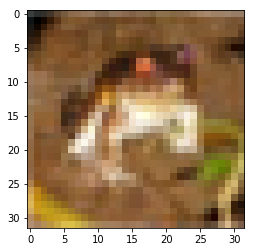

In [109]:
plt.imshow(img)

But if you iterate on the dataset it is transformed (normalized and converted to tensors in this case) and laid out as channels x height x width

Note an iterator over the training set gives individual examples, not minibatches.

Iterator over trainloader yields minibatches.

In [110]:
img, label = next(iter(trainset))

In [111]:
img.min(), img.max(), img.shape

(tensor(-1.), tensor(1.), torch.Size([3, 32, 32]))

frog
truck
truck
deer


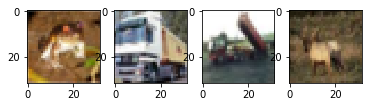

In [112]:
fig, axs = plt.subplots(1,4)

for (img, label), ax in zip(trainset, axs):
    # rescale to be > 0
    img = (img + 1)/2
    # 1st dim (height) -> 0th, 2nd dim (width) -> 1st and 0th dim (channel) last for numpy imshow compatibility
    img = np.transpose(img, (1, 2, 0))
    ax.imshow(img)
    print(classes[label])

Define an NN (very similar to one discussed above)

In [113]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3-channel in, 6-channel out, 5x5 convolution
        self.pool = nn.MaxPool2d(2, 2)  # this layer has no learnable parameters but it can be a instance attribute
        self.conv2 = nn.Conv2d(6, 16, 5) # 6-channel in, 16-channel out, 5x5
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # linear layers
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)  # unravel retaining batch axis
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Create loss function and optimizer

In [114]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Train (this will take ~ 2 minutes)

In [115]:
%%time

for epoch in range(2):  # two epochs

    # accumulated over several minibatches (not necessarily the full epoch)
    running_loss = 0.0
    
    # trainloader yields batches, i is therfore minibatch number
    for i, data in enumerate(trainloader, 0):  

        # inputs.shape = batchsize x channels x height x width
        # labels.shape = batchsize
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # item method extract scalar value from single item tensor
        running_loss += loss.item()

        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            # reset every 2000 minibatches)
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.213
[1,  4000] loss: 1.844
[1,  6000] loss: 1.648
[1,  8000] loss: 1.546
[1, 10000] loss: 1.506
[1, 12000] loss: 1.472
[2,  2000] loss: 1.393
[2,  4000] loss: 1.348
[2,  6000] loss: 1.347
[2,  8000] loss: 1.316
[2, 10000] loss: 1.309
[2, 12000] loss: 1.284
Finished Training
CPU times: user 1min 32s, sys: 20.4 s, total: 1min 53s
Wall time: 1min 44s


## Inference

Get a batch

In [116]:
imgs, labels = next(iter(testloader))
imgs.shape  # batchsize x channels x height x width

torch.Size([4, 3, 32, 32])

Note these aren't actually probabilities. What are they? Log likelihoods I think.

In [117]:
probabilities = net(imgs)
probabilities.shape  # batchsize x nclasses

torch.Size([4, 10])

In [118]:
probabilities

tensor([[-1.9631, -2.2959,  0.6060,  3.7058, -0.5408,  3.0724,  1.4886, -0.0051,
          0.0848, -1.4649],
        [ 4.7998,  2.6115,  0.2131, -2.6927, -2.2197, -3.5493, -4.5815, -3.6177,
          5.7601,  0.7420],
        [ 2.2157,  1.3510,  0.4544, -0.9753, -1.1117, -1.1044, -2.9582, -1.1338,
          1.8229,  0.4351],
        [ 2.2250, -0.5927,  0.8436, -0.8129, -0.7134, -1.4270, -1.6472, -1.8957,
          3.3251, -0.5638]], grad_fn=<ThAddmmBackward>)

The `max` method of a tensor (or `torch.max`) gives a tuple containing both the maximum value and its index

`torch.max` tracks gradients if present in input.

In [119]:
max_probability, predicted_labels = probabilities.max(dim=1)

truth: cat prediction: cat
truth: ship prediction: ship
truth: ship prediction: plane
truth: plane prediction: ship


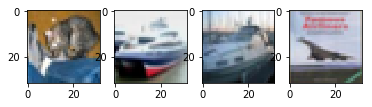

In [120]:
fig, axs = plt.subplots(1,4)

for img, label, predict, ax in zip(imgs, labels, predicted_labels, axs):
    # rescale to be > 0
    img = (img + 1)/2
    # 1st dim (height) -> 0th, 2nd dim (width) -> 1st and 0th dim (channel) last for numpy imshow compatibility
    img = np.transpose(img, (1, 2, 0))
    ax.imshow(img)
    print("truth:", classes[label], "prediction:", classes[predict])

## Evaluation

Across entire epoch (takes a couple of seconds)

In [121]:
%%time

correct = 0
total = 0

# context manager that temporarily disables gradient tracking (faster?)
with torch.no_grad():
    
    # for each batch
    for data in testloader:
        images, labels = data
        outputs = net(images)
        # not sure of significance of data attribute here
        _, predicted = torch.max(outputs.data, 1)
        
        # batchsize
        total += labels.size(0)
        
        # accumulate scalar
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %
CPU times: user 4.42 s, sys: 944 ms, total: 5.36 s
Wall time: 5.15 s


Note with grads: same speed! What's the point of the `no_grad` context above `¯\_(ツ)_/¯`

In [122]:
%%time

correct = 0
total = 0

# for each batch
for data in testloader:
    images, labels = data
    outputs = net(images)
    # not sure of significance of data attribute here
    _, predicted = torch.max(outputs.data, 1)

    # batchsize
    total += labels.size(0)

    # accumulate scalar
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %
CPU times: user 4.55 s, sys: 995 ms, total: 5.54 s
Wall time: 5.1 s


Note this is better than chance (10%)!

## Device-independent code

In [123]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [124]:
device

device(type='cpu')

Then calling `net.to(device)` moves all the parameters (and gradient buffers) to the device.

You also need to do `inputs, labels = inputs.to(device), labels.to(device)` in the training loop (and evaluation loop)?

You won't actually see a huge speedup for this simple network on a GPU, but increasing the number of conv2d channels (i.e. the width of the network) apparently results in a big speedup